In [1]:
from mosaic.sentinel2 import download, NO_DATA
import datetime

bbox = (
    46.00, 
    -16.10,
    46.07, 
    -16.17,
)
start = datetime.datetime(2021, 10, 5)
end = datetime.datetime(2021, 10, 7)

time_interval = (start, end)
output = 'example.tiff'

download(bbox, time_interval, output, split_shape=(1,1))

gdalwarp -dstnodata -9999 -overwrite -s_srs EPSG:4326 -t_srs EPSG:4326 -te 46.0 -16.1 46.07 -16.17 --optfile input.txt "example.tiff"


In [2]:
import rasterio
with rasterio.open('example.tiff') as f:
    bands = f.read()
    bands = bands[:-1, :, :]
    datamask = bands[-1, :, :]
    bands = bands.transpose((1, 2, 0))

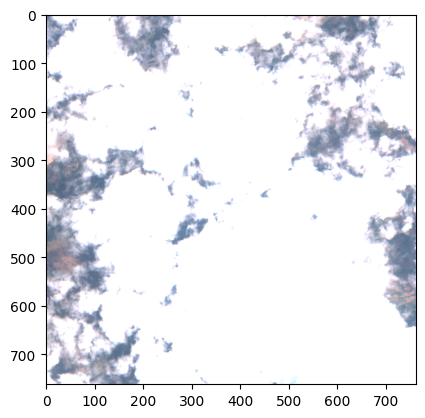

In [3]:
import matplotlib.pyplot as plt
bands[bands==NO_DATA] = 0
plt.imshow(bands[:, :, [3,2,1]].clip(0, 3000)/3000)

In [4]:
from dynamicworld.inference import Inference

inference = Inference(cloud=None)
prob = inference.predict(bands)
out = prob.argmax(-1)

plt.figure(figsize = (3,3))
plt.imshow(out)
plt.show()

100%|██████████| 3/3 [00:00<?, ?it/s]


: 

: 